In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
redikod_historical_rainfall_data_in_bangladesh_path = kagglehub.dataset_download('redikod/historical-rainfall-data-in-bangladesh')

print('Data source import complete.')

100%|██████████| 2.22M/2.22M [00:00<00:00, 84.3MB/s]

Extracting files...
Data source import complete.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
nRowsRead = 1000

df1 = pd.read_csv('/content/drive/MyDrive/Rainfall_data/customized_daily_rainfall_data.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'customized_daily_rainfall_data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 6 columns


In [6]:
df1.head(5)

,StationIndex,Station,Year,Month,Day,Rainfall
0,1,Dhaka,1970,1,1,0
1,1,Dhaka,1970,1,2,0
2,1,Dhaka,1970,1,3,0
3,1,Dhaka,1970,1,4,0
4,1,Dhaka,1970,1,5,0


**Distribution graphs (histogram/bar graph) of sampled columns:**

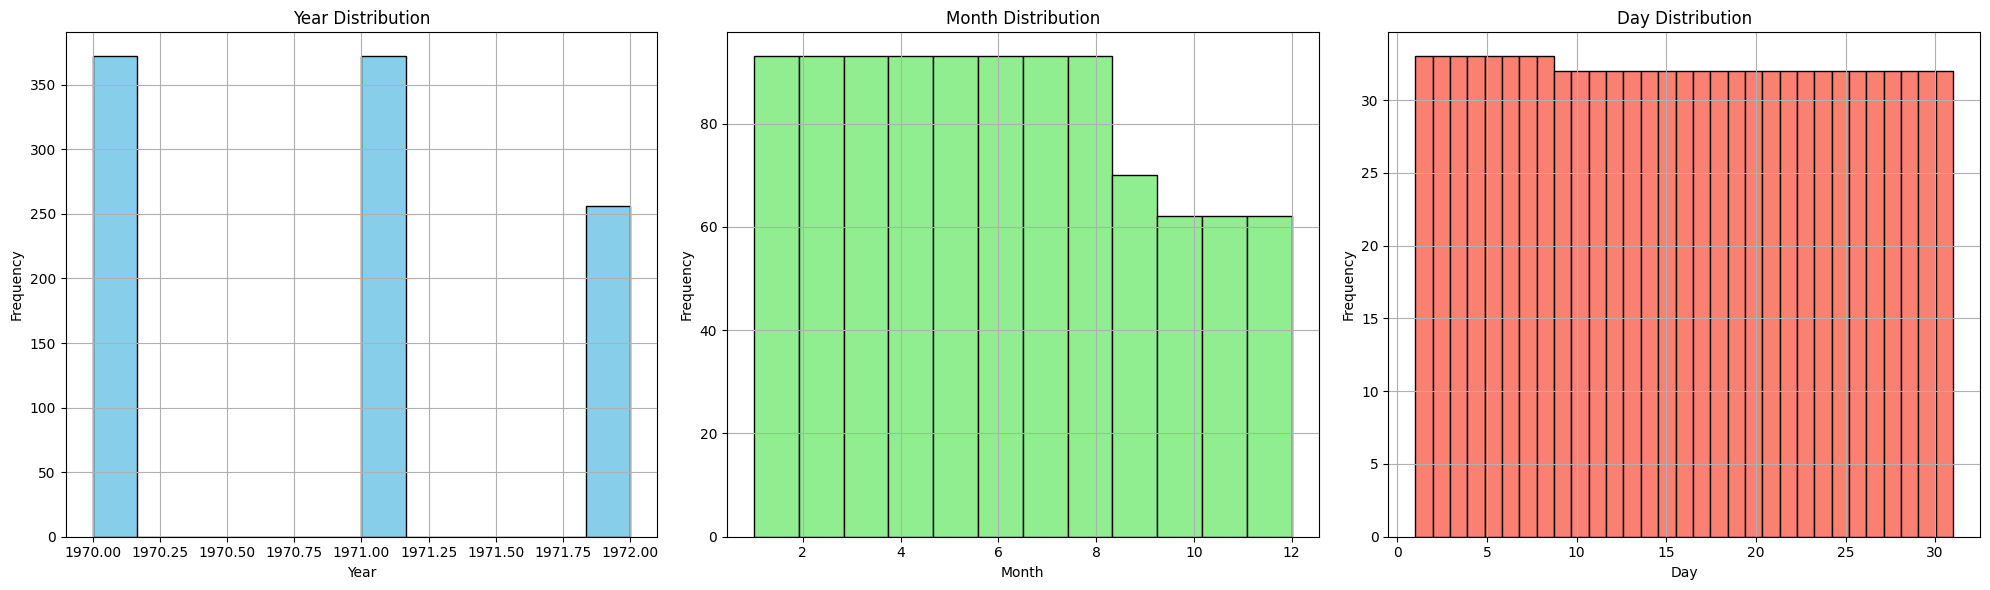

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot histogram for 'Year'
df1['Year'].hist(ax=axes[0], bins=12, color='skyblue', edgecolor='black')
axes[0].set_title('Year Distribution')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'Month'
df1['Month'].hist(ax=axes[1], bins=12, color='lightgreen', edgecolor='black')
axes[1].set_title('Month Distribution')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Frequency')

# Plot histogram for 'Day'
df1['Day'].hist(ax=axes[2], bins=31, color='salmon', edgecolor='black')
axes[2].set_title('Day Distribution')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# **Correlation matrix1:**





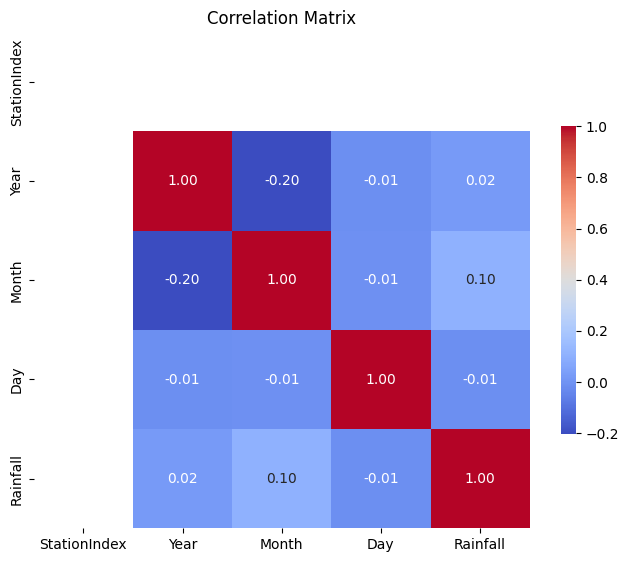

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df1.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# Set the title
plt.title('Correlation Matrix')

# Display the plot
plt.show()


# **Scatter and density plots1:**

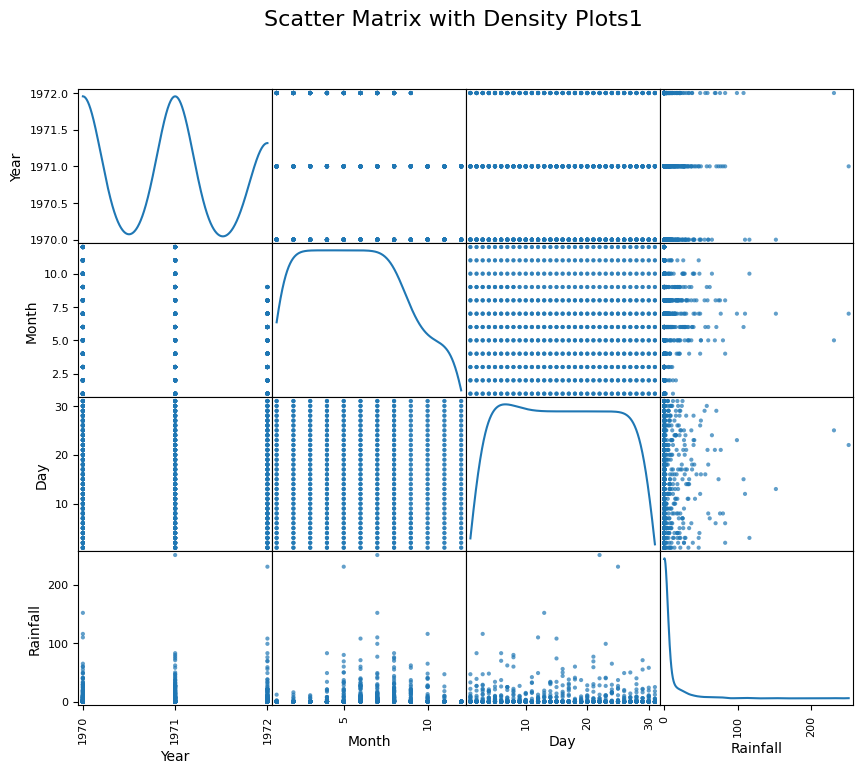

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Assuming df1 is your DataFrame and contains 'Year', 'Month', and 'Day' columns

# Select the relevant columns
df_selected = df1[['Year', 'Month', 'Day', 'Rainfall']]

# Create the scatter matrix with KDE plots on the diagonal
scatter_matrix(df_selected, figsize=(10, 8), alpha=0.7, diagonal='kde')

# Set the overall title for the plot
plt.suptitle('Scatter Matrix with Density Plots1', fontsize=16)

# Display the plot
plt.show()

 **2nd file: ../input/data_monthly_rainfall.csv**

In [11]:
nRowsRead = 1000
df2 = pd.read_csv('/content/drive/MyDrive/Rainfall_data/data_monthly_rainfall.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'data_monthly_rainfall.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 5 columns


In [12]:
df2.head(5)

,Year,Station,Month,Rainfall,StationIndex
0,1970,Barisal,1,0,2
1,1970,Barisal,2,24,2
2,1970,Barisal,3,5,2
3,1970,Barisal,4,91,2
4,1970,Barisal,5,124,2


**Distribution graphs (histogram/bar graph) of sampled columns:**

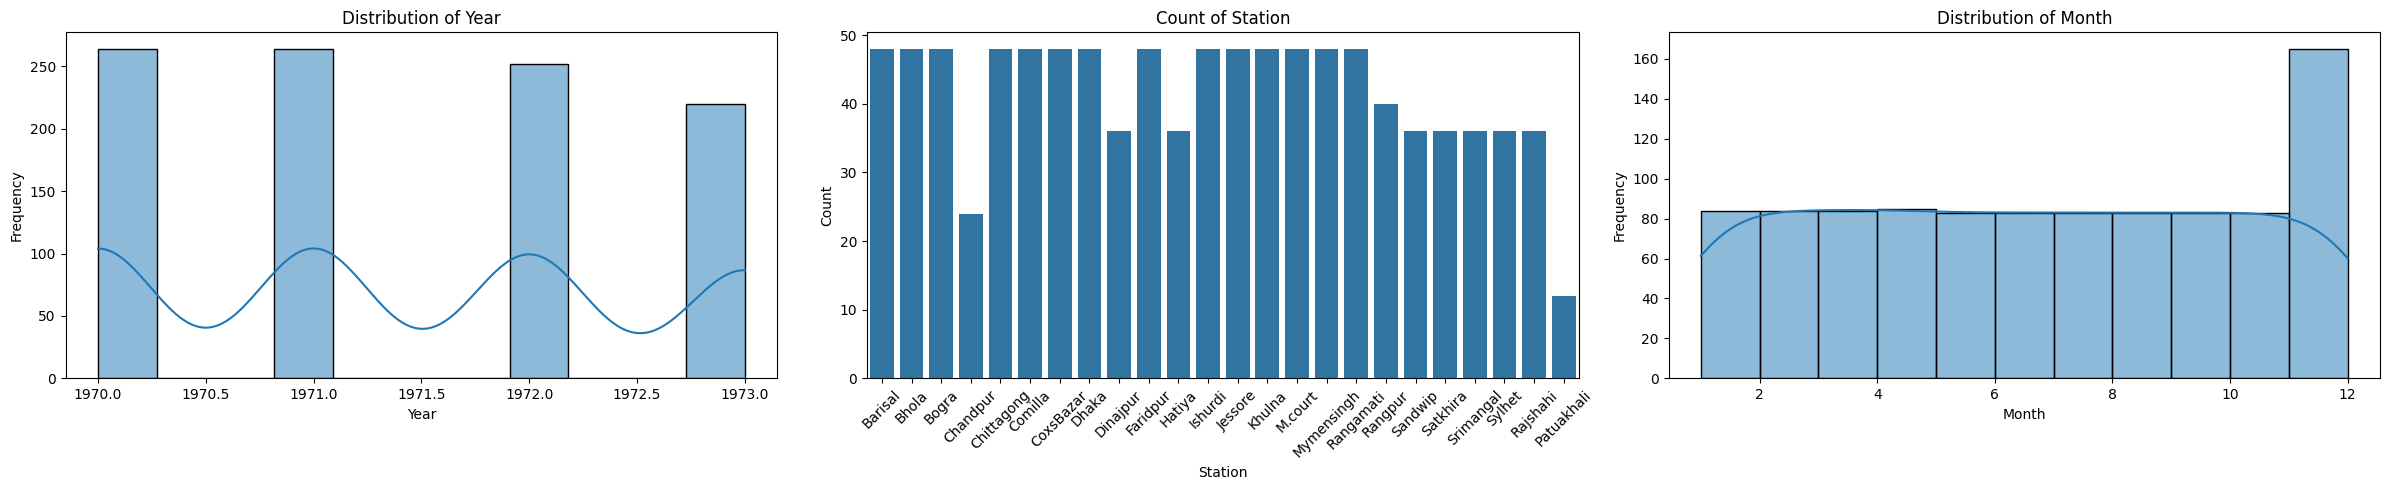

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the columns to plot
columns_to_plot = ['Year', 'Station', 'Month', 'station_index']

# Filter out columns that are not in df2
columns_to_plot = [col for col in columns_to_plot if col in df2.columns]

# Determine the number of columns to plot
num_cols = len(columns_to_plot)

# Set up the matplotlib figure
fig, axes = plt.subplots(1, num_cols, figsize=(8* num_cols, 5))

if num_cols == 1:
    axes = [axes]

for i, col in enumerate(columns_to_plot):
    # Drop missing values
    data = df2[col].dropna()

    # Check if data is numeric
    if pd.api.types.is_numeric_dtype(data):
        sns.histplot(data, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        # Handle non-numeric data, e.g., by counting occurrences
        sns.countplot(x=data, ax=axes[i])
        axes[i].set_title(f'Count of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        # Rotate x-axis labels if there are many categories
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# **Correlation matrix2:**

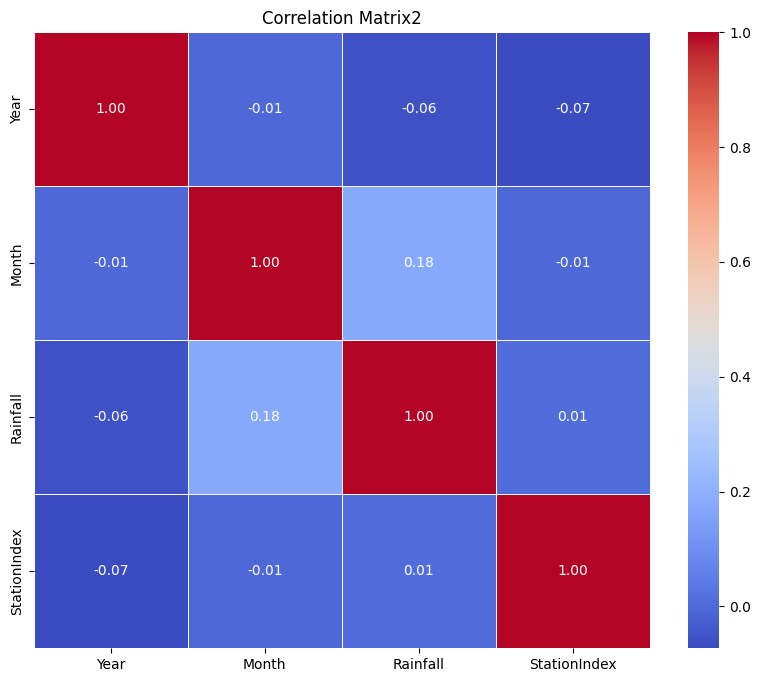

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df2.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)

# Add title
plt.title('Correlation Matrix2')

# Display the plot
plt.show()




# **Scatter and density plots2:**

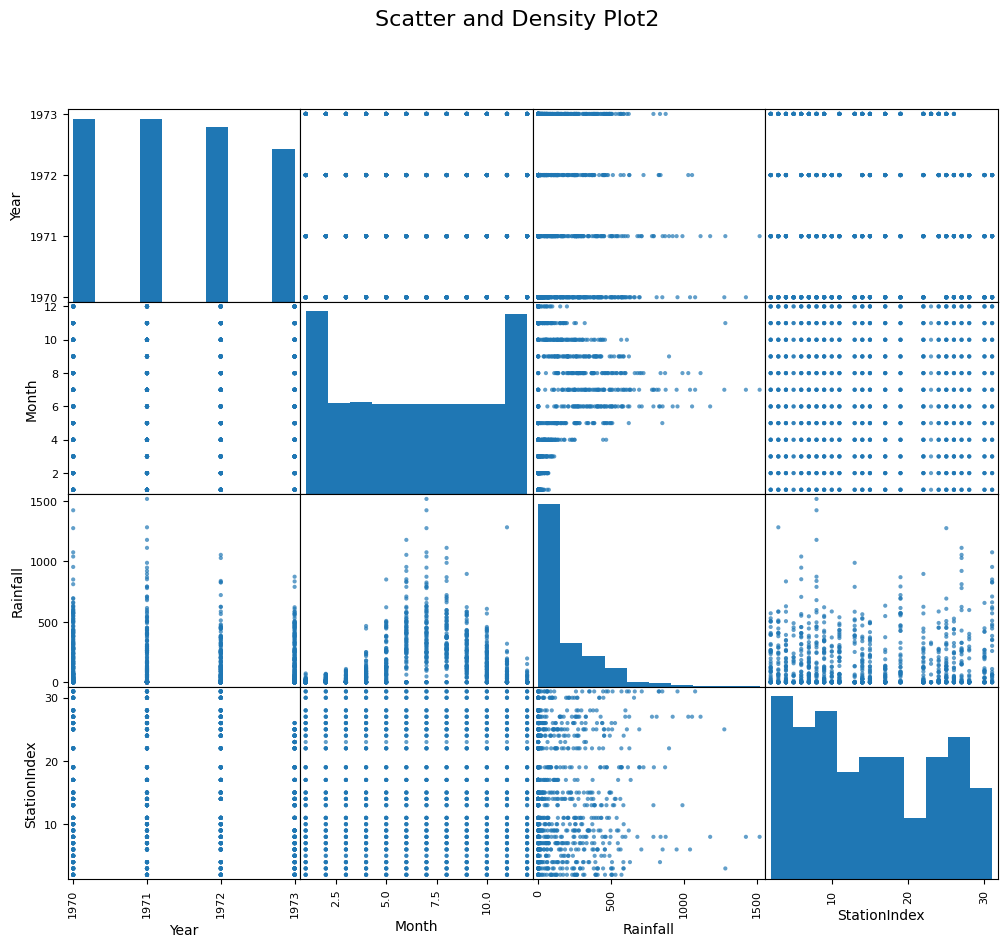

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Assuming df2 is your DataFrame
scatter_matrix(df2, figsize=(12, 10), alpha=0.7, diagonal='hist')
plt.suptitle('Scatter and Density Plot2', fontsize=16)
plt.show()

# **3rd file: ../input/rainfall_data_bangladesh_1948_to_2014.csv**

In [18]:
nRowsRead = 1000
df3 = pd.read_csv('/content/drive/MyDrive/Rainfall_data/rainfall_data_bangladesh_1948_to_2014.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'rainfall_data_bangladesh_1948_to_2014.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 34 columns


In [19]:
df3.head(5)

,Station,Year,Month,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,Bogra,1948,1,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
1,Bogra,1948,2,0,0,0,4,1,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,Bogra,1948,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bogra,1948,4,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,18,NaN
4,Bogra,1948,5,0,24,0,0,0,0,0,...,9,7,24,31,14,0,1,8,0,0


**Distribution graphs (histogram/bar graph) of sampled columns**

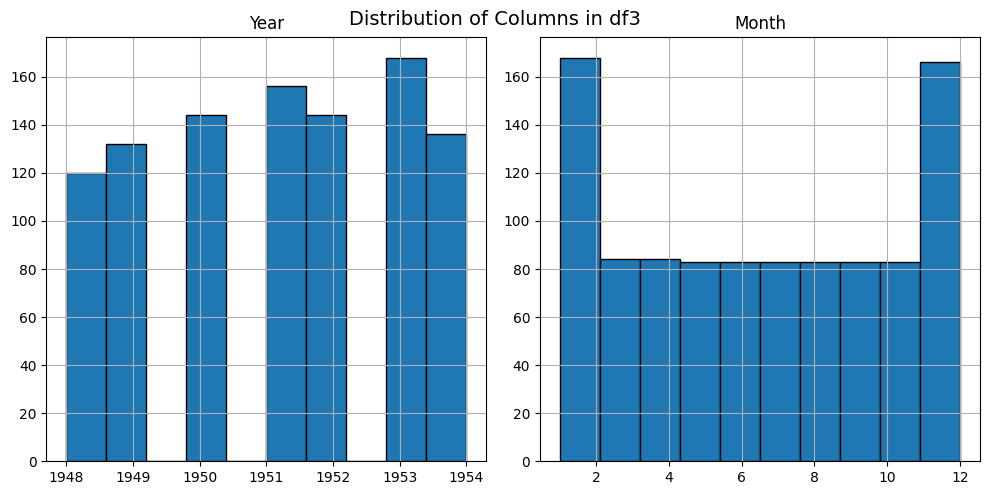

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your DataFrame
df3.hist(figsize=(10, 5), bins=10, edgecolor='black')
plt.tight_layout()
plt.suptitle('Distribution of Columns in df3', fontsize=14)
plt.show()

# **Correlation matrix3**

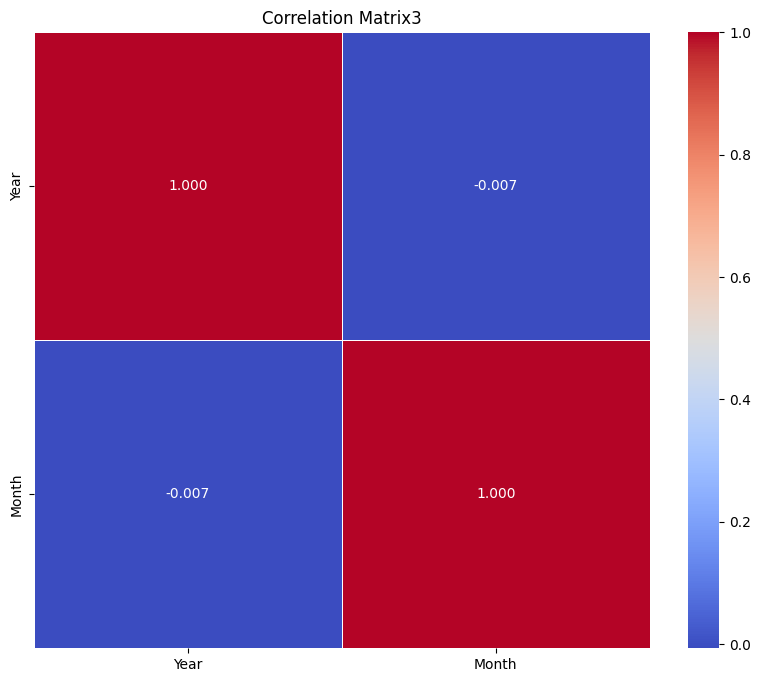

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df3.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', square=True, linewidths=0.5)

# Add title
plt.title('Correlation Matrix3')

# Display the plot
plt.show()

# **Scatter and density plots3:**

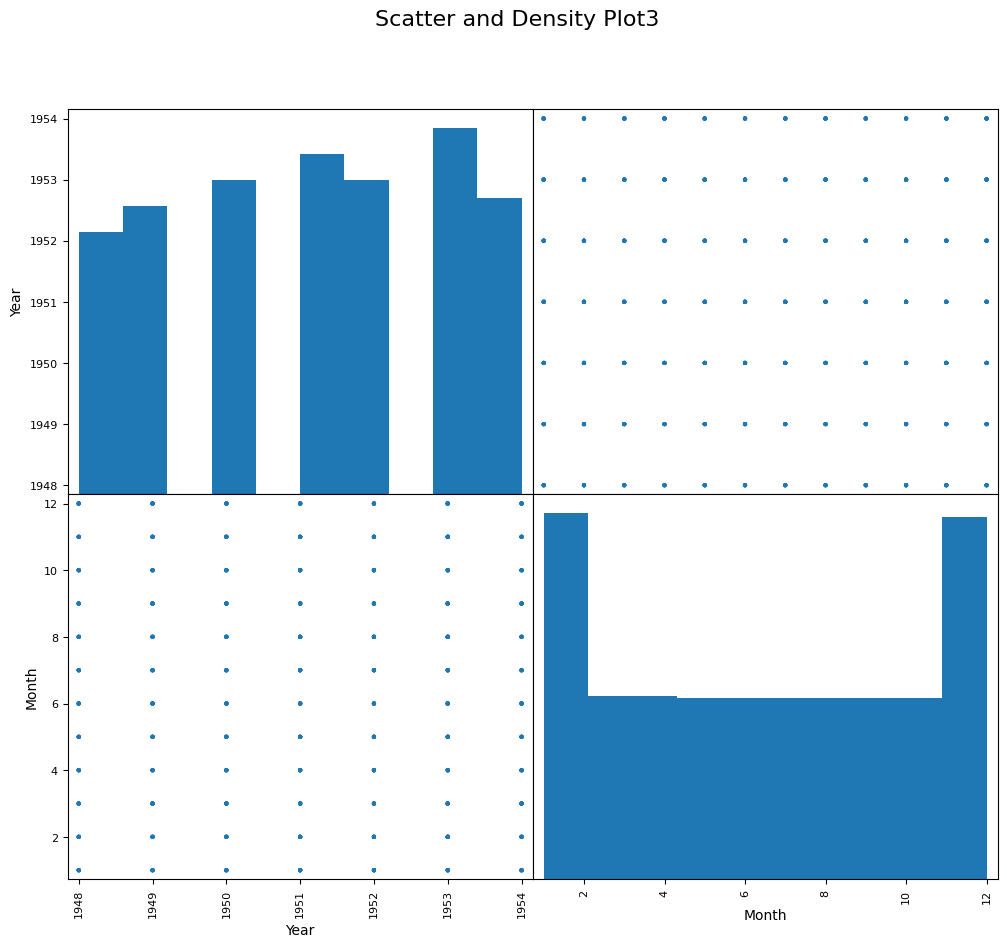

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Assuming df2 is your DataFrame
scatter_matrix(df3, figsize=(12, 10), alpha=0.7, diagonal='hist')
plt.suptitle('Scatter and Density Plot3', fontsize=16)
plt.show()